<a href="https://colab.research.google.com/github/sshar180/Machine-Learning-/blob/main/Decision_Tree_Phishing_Websites_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $$DETECTION-OF-PHISHING-WEBSITES$$
## Algorithm Implemented - Decision Tree
### Off The Shelf Implementation

#**IMPORTING REQUIRED LIBRARIES**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve, auc
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV  

#**LOADING CSV FILE INTO DATA AND READING IT**
## Read and Load Data
 The dataset contains a total of 11055 websites, each containing 30 columns (Attribute features) of data.





In [ ]:
df=pd.read_csv(r"./sample_data/dataset.csv")
df.head()

,Unnamed: 0,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,2,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,3,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,4,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


#**DATASET SPLITTING**


In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
#@title Decision Tree Hyperparameter Tuning

parameters = {'max_depth' : (10,15,20,25, 28 ,29,32,40,50)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2',)
              , 'min_samples_split' : (2,4,6)
             }
             
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)


Hyper Parameters for Decision Tree

In [ ]:
DT_grid.fit(X_train,Y_train)
DT_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=29, max_features='auto')

In [ ]:
#@title Decision Tree Sklearn Model
dtree=DecisionTreeClassifier(max_depth=25, max_features='auto')
model_3=dtree.fit(X_train,Y_train)

Decision Tree Model Fit

In [ ]:
dtree_predict=model_3.predict(X_test)

#**Model Accuracy**

In [ ]:
accuracy_score(Y_test,dtree_predict)  

0.9497964721845319

***Classification report for Sklearn implementation***

In [ ]:
print(classification_report(dtree_predict,Y_test))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94       955
           1       0.96      0.95      0.96      1256

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



***Confusion matrix***

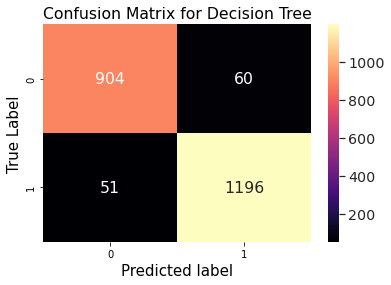

<Figure size 720x504 with 0 Axes>

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, dtree_predict)#turn predicted and actual array into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#setting axis titles
ax.set_title('Confusion Matrix for Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

#***Ploting ROC Curve for 5 FOLDS***

In [ ]:
def plot_roc_curve(fprates, tprates):
    """Ploting the Receiver Operating Characteristic using the list
    of true positive  and false positive ."""
    
    # Initialize useful lists + the plot axes.
    tprate_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprates, tprates)):
        tprate_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprate_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line in Roc curve.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC Curve.
    mean_tpr = np.mean(tprate_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC Curve.
    std_tpr = np.std(tprate_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='green', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = model_3.predict_proba(x.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

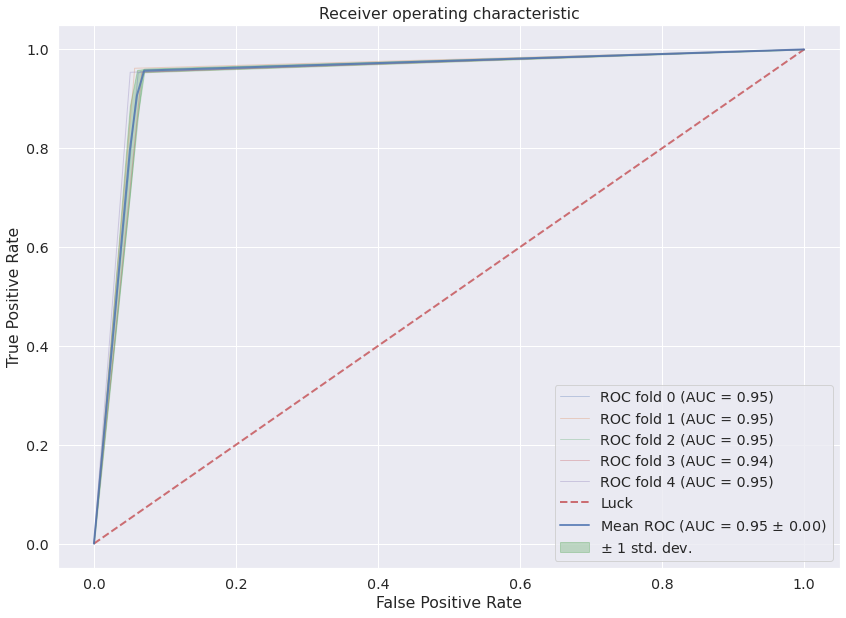

,AUC Train Data,AUC Test Data
0,0.999993,0.945982
1,0.999998,0.952246
2,0.999999,0.945276
3,1.000000,0.943159
4,1.000000,0.951307


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
x = pd.DataFrame(X)
y = pd.DataFrame(Y)
    
for (train, test), i in zip(cv.split(x, y), range(5)):
    model_3.fit(x.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train Data', 'AUC Test Data'])

#***STRATIFIED 5 FOLDS WORK***
*A cross validation procedure is made on the model to garner the overall Performance metrics of the model. 

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation 
       ---------
      _X: array
           matrix of features.
      _y: array
            target variable.
      _cv: int, default=5
          the number of folds for cross-validation function
       Returns 
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        
        # Set size of bar plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='red', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='blue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

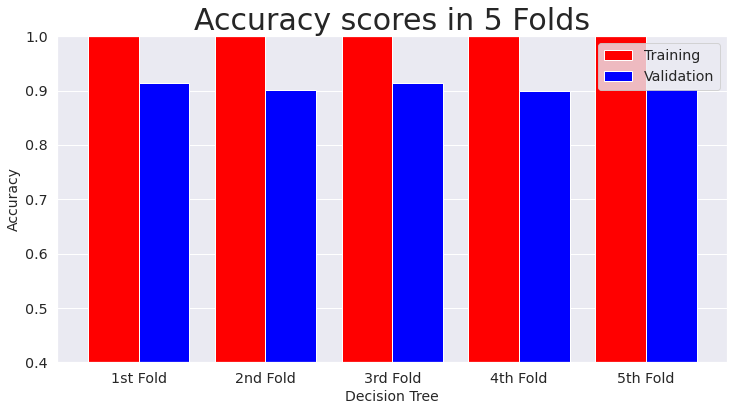

In [ ]:
decision_tree_result = cross_validation(model_3, X_test, Y_test, 5)
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

In [ ]:
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.91422122, 0.90045249, 0.91402715, 0.89819005, 0.90271493]), 'Mean Validation Accuracy': 90.59211668692481, 'Validation Precision scores': array([0.90458015, 0.90873016, 0.91699605, 0.9015748 , 0.91532258]), 'Mean Validation Precision': 0.9094407485255024, 'Validation Recall scores': array([0.948     , 0.916     , 0.93172691, 0.91967871, 0.91164659]), 'Mean Validation Recall': 0.9254104417670682, 'Validation F1 scores': array([0.92578125, 0.9123506 , 0.92430279, 0.91053678, 0.91348089]), 'Mean Validation F1 Score': 0.9172904602180221}


#**Decision Tree CLASSIFICATION IMPLEMENTATION (SCRATCH)**

***Tree Node***

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # decision node
        #feature index value
        self.feature_index = feature_index
        # threshold value
        self.threshold = threshold
         # left sub tree
        self.left = left
         # right sub tree
        self.right = right
        self.info_gain = info_gain
        #  leaf node
        self.value = value


***Decision Tree Classifier***

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # the root of the tree 
        self.root = None
        
        # Termination conditions
        self.min_samples_split = min_samples_split
        # maximum depth of tree
        self.max_depth = max_depth
        
    def build_decision_tree(self, dataset, curr_depth=0):
        ''' The recursive function to build the tree ''' 
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until The Termination conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # finding  the best split set
            best_split = self.best_split(dataset, num_samples, num_features)
            # checking the information gain is positive
            if best_split["info_gain"]>0:
                # recursion left
                left_subtree = self.build_decision_tree(best_split["dataset_left"], curr_depth+1)
                # recursion right
                right_subtree = self.build_decision_tree(best_split["dataset_right"], curr_depth+1)
                # Return Decision Tree
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # computing the leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # returning the leaf node
        return Node(value=leaf_value)
    
    def best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # Creating the dictionary to store the best split nodes
        best_split = {}
        max_info_gain = -float("inf")
        
        # looping all over the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.info_gain(y, left_y, right_y, "entropy")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        #Set feature index
                        best_split["feature_index"] = feature_index
                        #Set threshold
                        best_split["threshold"] = threshold
                        # Set dataset_left
                        best_split["dataset_left"] = dataset_left
                        # Set dataset_right
                        best_split["dataset_right"] = dataset_right
                        # Set info_gain
                        best_split["info_gain"] = curr_info_gain
                        # Set curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def info_gain(self, parent, l_child, r_child, mode="gini"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.get_gini_index(parent) - (weight_l*self.get_gini_index(l_child) + weight_r*self.get_gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def get_gini_index(self, y):
        ''' Function to get the gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' Function to get leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' Function for printing the tree nodes '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_decision_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

***Fitting Decision Tree Classifier***

In [ ]:
#Decision Tree Classifier
classifier = DecisionTreeClassifier(min_samples_split=4, max_depth=32)
classifier.fit(X_train,Y_train)
classifier.print_tree()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#**Model Accuracy**

In [ ]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9507010402532791

***Classification report for Sklearn implementation***

In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.94       953
           1       0.96      0.95      0.96      1258

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



***Confusion matrix***

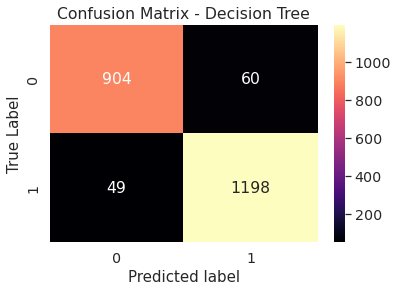

<Figure size 720x504 with 0 Axes>

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
#turn the predicted and true value into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#ploting  the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#setting the axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

#**Ploting ROC Curve for 5 FOLDS**

In [ ]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = [] #tprate_interp
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = classifier.predict(x.iloc[index].values)
    # print(y_predict)
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

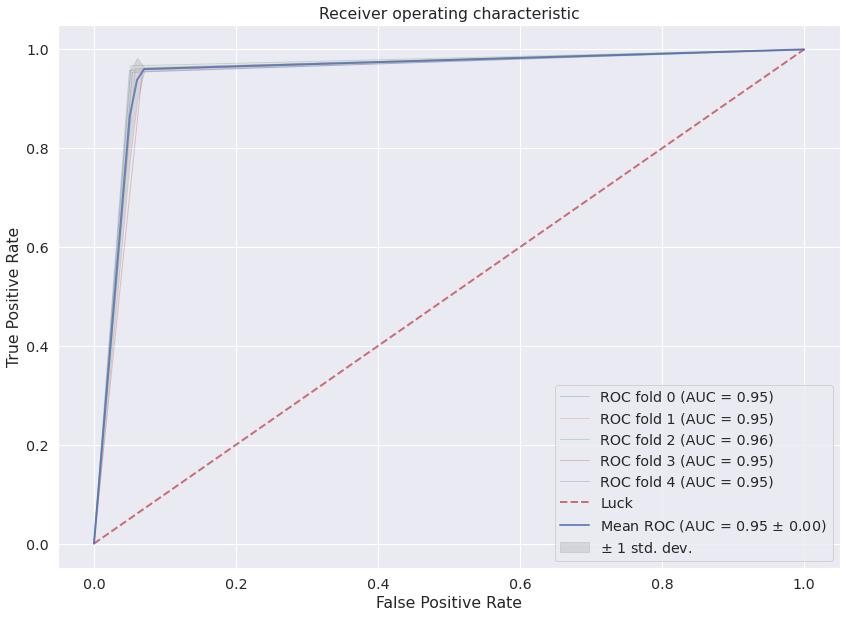

,AUC Train,AUC Test
0,0.994603,0.949807
1,0.995290,0.951422
2,0.994553,0.957326
3,0.995087,0.945489
4,0.993814,0.953871


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
x = pd.DataFrame(X)
y = pd.DataFrame(Y)
    
for (train, test), i in zip(cv.split(x, y), range(5)):
    classifier.fit(x.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])